In [105]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cnst
from sympy import *
import scipy.special as spc
from scipy import integrate
import pandas as pd
import scipy.io as scio
import os, sys
from PIL import Image 
import matplotlib.image as img
from matplotlib_scalebar.scalebar import ScaleBar
# from brokenaxes import brokenaxes
from matplotlib.offsetbox import AnchoredText

from matplotlib.colors import LinearSegmentedColormap,ListedColormap

# from pytictoc import TicToc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from jupyterthemes import jtplot
jtplot.style(theme='grade3',figsize=[10,8],grid=True,spines=True)
%matplotlib inline
# %matplotlib qt5

hbar= cnst.hbar
#hbar=1.054571596*10**-34      #reduced Planck's constant,J/s
kB=cnst.Boltzmann
#kB=1.3806503*10**-23        #Boltzmann's constant, J/K


omega2F=2*np.pi*384.2304844685*10**12    #D2 resonant frequency,Hz
Gamma2F=2*np.pi*6.0666*10**6     #damping rate, Hz
omega1F=2*np.pi*377.1074635*10**12    #D1 resonant frequency,Hz
Gamma1F=2*np.pi*5.746*10**6     #damping rate, Hz
c=cnst.c
#c=2.99792458*10**8         #speed of light
#muB=9.27400899*10**-24      #Bohr magneton,J/T
muB=cnst.physical_constants['Bohr magneton'][0]
a0=cnst.physical_constants['Bohr radius'][0]#Bohr radius

a11=100.4*a0#scatterring length between |F=1,mF=-1> Rb87 atoms
mRb=1.44316060*10**-25        #atomic mass of Rb87, kg
g3D=4*np.pi*hbar**2*a11 /mRb# interaction strength in 3D

wavelength=1064.*10**-9
Er=2*hbar**2*np.pi**2/mRb/(wavelength)**2    #recoil energy
k=2*np.pi/wavelength
g=cnst.g    #gravitational constant, kg*m/s^2
mu0=4*np.pi*10**-7# permeability of vacuum
epsilon0=(mu0*c**2)**-1 # permitivity of vacuum
eta0=377   # characteristic impedance of vaccum

cp=1/0.05974

from scipy import optimize

def fitSin(x,A,omega,phi,y0):
    return A*np.sin(2*np.pi*omega*x+phi*np.pi)+y0

def fitGaussPlusSin(x,A1,omega,phi,y0,A2,w,x0):
    return A1*np.sin(2*np.pi*omega*x+phi*np.pi)+y0+A2*np.exp(-(x-x0)**2/w**2)

def fitLorentz(x,A,w,xc,y0):
    return 2*A/np.pi*w/((x-xc)**2+w**2)+y0

count=0
valid=135


0

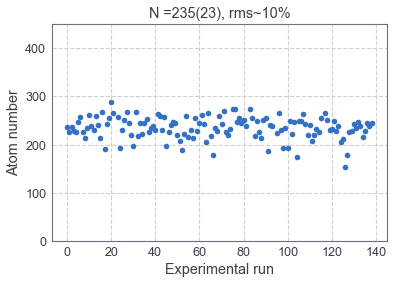

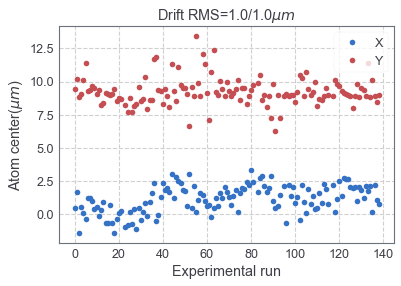

In [106]:
path = '//Olbpcnew/E/20200618/0618Morning/etalonGallery02'
# path = '/Volumes/E/Rubidium/RbData/2019/20190102/0102Morning/etalonGallery02'
imgFiles = sorted(os.listdir( path ))
# imgFiles=sorted(os.listdir(dataFolder))
# online='analyResult'
online='analyImgs_Batch'

nAtom=[]
filling=[]
roiSize=9#in 9x9
cnt=0
imbx=[]
imby=[]
# print(dirs)
roiSites=[]
centerx=[]
centery=[]
pixelSize=.102
latticePhasex=[]
latticePhasey=[]
valid=0
# selectedSites=
# filledSites=-np.ones([roiSize,roiSize])# init to spin down 
for i in range(len(imgFiles)):
#     print(file)
    if '-1.tiff' in imgFiles[i] :
        cnt=0
        try:

            dataFile = path+'/'+online+'/03.Reconstruct/output/'+imgFiles[i][:-7]+'-fig1/allInOne.mat'  
#             print(dataFile)
            data = scio.loadmat(dataFile)
#             print(data)
    #         print(data['FillNumL1'][0,roiSize-1])
    #             print(data['FillRate1'][0,5])
#             print(data['FillNumL1'][0,roiSize-1])
            try:

                if data['FillNumL1'][0,-1]> 200*0.75:
                    nAtom=np.append(nAtom,data['FillNumL1'][0,-1])
                    filling=np.append(filling,data['FillRate1'][0,roiSize-1])
    # #                 cnt=cnt+1
    #             else:

    #                 nAtom=np.append(nAtom,np.nan)
    # #                 loss=np.append(loss,np.nan)
    #             print(data['Pos_GridCurr'][1054])
    #             print(range(len(data['Pos_GridCurr'])))

                    xAngle=-data['LatAng'][0][0]/180*np.pi
                    yAngle=-data['LatAng'][0][1]/180*np.pi
                    selectedSites=[]
                    midPosIndex=int(len(data['Pos_GridCurr'])/2)
                    filledSites=-np.ones([roiSize,roiSize])# init to spin down 
                    valid=valid+1
#####################################ROI selection######################################
                    for pos in data['FilledAtom1']:
                #                 print(xAngle)
                #         print(i)
                #         pos=data['Pos_GridCurr'][i]
                #         print(pos)
                        xrotatedPosx=(pos[0] - data['midPos1'][0][0])*np.cos(xAngle)+\
                        (pos[1] - data['midPos1'][0][1])*np.sin(xAngle)
                        yrotatedPosx=(pos[0] - data['midPos1'][0][0])*np.cos(yAngle)+\
                        (pos[1] - data['midPos1'][0][1])*np.sin(yAngle)

                        if (np.abs(xrotatedPosx) <= ((roiSize-1)/2+.5)*data['LatGrid'][0][0]) \
                       and (np.abs(yrotatedPosx) <= ((roiSize-1)/2+.5)*data['LatGrid'][0][1]):
                            i=int(round(xrotatedPosx/data['LatGrid'][0][0]))+int((roiSize-1)/2)
                            j=int(round(yrotatedPosx/data['LatGrid'][0][1]))+int((roiSize-1)/2)

                            filledSites[i,j]=1
                            cnt=cnt+1
                            selectedSites=np.append(selectedSites,pos)
#####################################################################################       
        
        
#                     roiSites=np.append(roiSites,filledSites)
#                     imby=np.append(imby,np.sum(np.reshape(np.diff(np.sum(filledSites,1)),(int((roiSize-1)/2),2))[:,0])\
#                 /((roiSize-1)/2*2*roiSize))

#                     print(np.sum(masks))
#                     imbx=np.append(imbx,np.sum(np.reshape(np.diff(np.sum(filledSites,0)),(int((roiSize-1)/2),2))[:,0])\
#                 /((roiSize-1)/2*2*roiSize))

############################## Imbalance statistics |-1,-1> cases filtered##################################################
#                     ymasks=filledSites[0:roiSize-1:2,:]+filledSites[1:roiSize:2,:]+2!=0
#                     imby=np.append(imby,np.abs(np.sum((filledSites[0:roiSize-1:2,:]-filledSites[1:roiSize:2,:])[ymasks]\
#                                                /np.sum(ymasks)/2)))
        
        
#                     xmasks=filledSites[:,0:roiSize-1:2]+filledSites[:,1:roiSize:2]+2!=0
#                     imbx=np.append(imbx,np.abs(np.sum((filledSites[:,0:roiSize-1:2]-filledSites[:,1:roiSize:2])[xmasks]\
#                                                /np.sum(xmasks)/2)))
                
                
                ##########################################################
                    centerx=np.append(centerx,data['midPos1'][0][1]*pixelSize)
                    centery=np.append(centery,data['midPos1'][0][0]*pixelSize)
                    siteX=data['Pos_GridCurr'][midPosIndex][0]*np.cos(yAngle)+\
                    data['Pos_GridCurr'][midPosIndex][1]*np.sin(yAngle)
                    siteY=data['Pos_GridCurr'][midPosIndex][0]*np.cos(xAngle)+\
                    data['Pos_GridCurr'][midPosIndex][1]*np.sin(xAngle)
                    latticePhasex=np.append(latticePhasex,(siteX\
                                            %data['LatGrid'][0][1]/data['LatGrid'][0][1]))# in terms of 2pi
                    latticePhasey=np.append(latticePhasey,(siteY\
                                            %data['LatGrid'][0][0]/data['LatGrid'][0][0]))
#                     cnt+=1
#                     print(data['LatGrid'])
#                     print(siteX)
#                     print(int(len(data['Pos_GridCurr'])/2))
                   
                else:
                    nAtom=np.append(nAtom,np.nan)
                    filling=np.append(filling,np.nan)
                    centerx=np.append(centerx,np.nan)
                    centery=np.append(centery,np.nan)
                    
                    latticePhasex=np.append(latticePhasex,np.nan)
                    latticePhasey=np.append(latticePhasey,np.nan)
    #             hopping=np.append(hopping,np.nan)
    #             loss=np.append(loss,np.nan)
                    roiSites=np.append(roiSites,filledSites*np.nan)
                    imbx=np.append(imbx,np.nan)
                    imby=np.append(imby,np.nan)
            except TypeError as e:
                print("Value error({0}): {1}".format(e.errno, e.strerror))
                nAtom=np.append(nAtom,np.nan)
                filling=np.append(filling,np.nan)
    #             hopping=np.append(hopping,np.nan)
    #             loss=np.append(loss,np.nan)
                roiSites=np.append(roiSites,filledSites*np.nan)
                imbx=np.append(imbx,np.nan)
                imby=np.append(imby,np.nan)

                centerx=np.append(centerx,np.nan)
                centery=np.append(centery,np.nan)
                
                
                latticePhasex=np.append(latticePhasex,np.nan)
                latticePhasey=np.append(latticePhasey,np.nan)
        except:
#             print('no file')
            imbx=np.append(imbx,np.nan)
            imby=np.append(imby,np.nan)
            nAtom=np.append(nAtom,np.nan)
            filling=np.append(filling,np.nan)
            centerx=np.append(centerx,np.nan)
            centery=np.append(centery,np.nan)

            latticePhasex=np.append(latticePhasex,np.nan)
            latticePhasey=np.append(latticePhasey,np.nan)
    
#     cnt=cnt+1
# print(len(selectedSites))
# print('files='+str(len(dirs)))
print('count='+str(cnt))
print('valid='+str(valid))

# selectedSitesResh=np.reshape(selectedSites,(cnt,2))
# plt.figure(facecolor='w',figsize=(10,10))

# plt.plot(data['Pos_GridCurr'][:,0],data['Pos_GridCurr'][:,1],'o',color='lightgray',markersize=12)
# plt.plot(selectedSitesResh[:,0],selectedSitesResh[:,1],'o',color='black',markersize=12)
# plt.grid()
# plt.xlim([5,195])
# plt.ylim([5,195])
# # plt.xlabel(False)
# plt.xticks([])
# plt.yticks([])
# # hopping=hoppibng/deltaT
# loss=loss/deltaT
# /Volumes/E/20200512/0512Afternoon/etalonGallery06/analyResult/03.Reconstruct/output/EtaloningPics_1.00-20.05.12-17.54.21--003-fig1/allInOne.mat

plt.figure(facecolor='w')
cut=-1
plt.plot(range(len(centerx[:cut])),nAtom[:cut],'o')
# plt.plot(range(len(centerx[:cut])),filling[:cut],'o',label='Y')
plt.xlabel('Experimental run')
plt.ylabel('Atom number')
plt.grid(linestyle='--')
# plt.legend(loc='upper right')
plt.title('N ='+format(np.nanmean(nAtom[:cut]),'0.0f')+'('+\
          format(np.nanstd(nAtom[:cut]),'0.0f')+'), rms~'+\
          format(np.nanstd(nAtom[:cut])/np.nanmean(nAtom[:cut])*100,'0.0f')+'%')
plt.ylim([0,450])
# plt.savefig(path+'/'+online+'/AtomNumber.png',dpi=300,bbox_inches='tight')

plt.figure(facecolor='w')
head=0
cut=-1
plt.plot(range(len(centerx[head:cut])),centerx[head:cut]-10,'bo',label='X')
plt.plot(range(len(centerx[head:cut])),centery[head:cut],'ro',label='Y')
plt.xlabel('Experimental run')
plt.ylabel('Atom center($\mu m$)')
plt.grid(linestyle='--')
plt.legend(loc='upper right')
plt.title('Drift RMS='+format(np.nanstd(centerx[head:cut]),'0.1f')+'/'+\
          format(np.nanstd(centery[head:cut]),'0.1f')+'$\mu m$')
# plt.ylim([-0,50])
# plt.savefig(path+'/'+online+'/LocDrift.png',dpi=300,bbox_inches='tight')




In [193]:
################################################-Meng's Try-##############################
np.savetxt("opt1.txt",centerx)
np.savetxt("opt2.txt",centery)

In [194]:
def pre_process(x):
    temp = x
    nan_list = []
    for i in range(len(temp)):
        if np.isnan(temp[i]):
            nan_list.append(i)
    mean = np.nansum(x)/(len(temp) - len(nan_list))
    for i in nan_list:
        temp[i] = mean
    print(mean)
    return temp

11.53761450622257


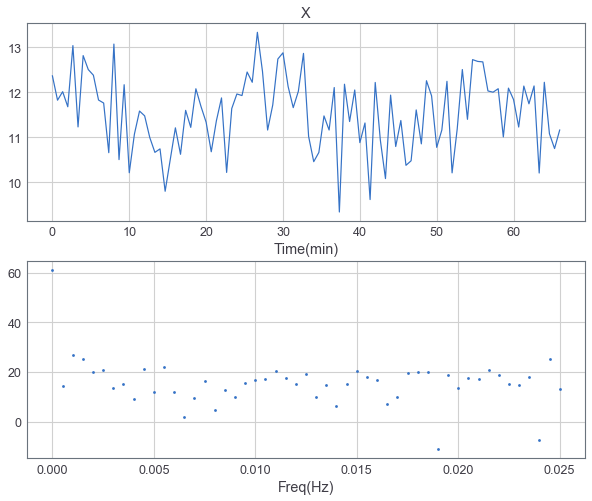

In [196]:
x = pre_process(centerx[40:])

# test_t = np.linspace(0,3*np.pi,1000)
# test = np.cos(test_t)

period = 40
sampling_rate = 1/period
fft_size = len(x) 

t = np.arange(0, period*len(x), period)
xs = x[:fft_size]
xf = np.fft.rfft(xs)
freqs = np.linspace(0, 1/period, len(x)//2+1)
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t[:fft_size]/60, xs)
plt.xlabel("Time(min)")
plt.title("X")
plt.subplot(212)
plt.plot(freqs, xfp,'.')
plt.xlabel("Freq(Hz)")
# pl.subplot(313)
# pl.plot(t[:fft_size], test)
plt.show()


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


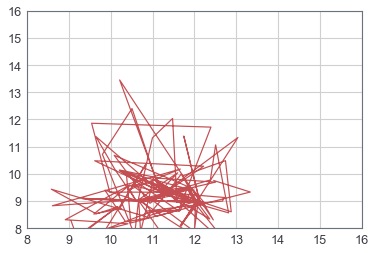

In [206]:
# %load Animation.py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
fig, ax = plt.subplots()
xdata, ydata = [], []
line, = ax.plot([], [], '-r', animated=False)

x = np.loadtxt(r"C:\Users\OptLa\Documents\Meng\\opt1.txt")
y = np.loadtxt(r"C:\Users\OptLa\Documents\Meng\\opt2.txt")


# x = np.linspace(9,15)
# y = np.linspace(9,15)

def init():
    ax.set_xlim(8, 16)
    ax.set_ylim(8, 16)
    return line,

def update(i):
    xdata.append(x[i])
    ydata.append(y[i])
    line.set_data(xdata, ydata)
    return line,

ani = FuncAnimation(fig, update, frames=range(len(x)),
    init_func=init, interval=150, blit=True)

ani.save("lll.gif")
plt.show()